https://huggingface.co/jonathandinu/face-parsing

id 	label 	note
0 	background

1 	skin

2 	nose

3 	eye_g 	eyeglasses

4 	l_eye 	left eye

5 	r_eye 	right eye

6 	l_brow 	left eyebrow

7 	r_brow 	right eyebrow

8 	l_ear 	left ear

9 	r_ear 	right ear

10 	mouth 	area between lips

11 	u_lip 	upper lip

12 	l_lip 	lower lip

13 	hair

14 	hat

15 	ear_r 	earring

16 	neck_l 	necklace

17 	neck

18 	cloth 	clothing

In [1]:
!wget https://huggingface.co/jonathandinu/face-parsing/resolve/main/config.json

--2024-12-11 06:13:36--  https://huggingface.co/jonathandinu/face-parsing/resolve/main/config.json
Resolving huggingface.co (huggingface.co)... 3.167.192.123, 3.167.192.4, 3.167.192.19, ...
Connecting to huggingface.co (huggingface.co)|3.167.192.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1689 (1.6K) [text/plain]
Saving to: ‘config.json’

config.json         100%[===================>]   1.65K  --.-KB/s    in 0s      

2024-12-11 06:13:36 (629 MB/s) - ‘config.json’ saved [1689/1689]



In [86]:
import numpy as np
import json
import torch
from transformers import SegformerImageProcessor, SegformerForSemanticSegmentation
from PIL import Image
from PIL import ImageOps
import matplotlib.pyplot as plt

In [3]:
with open('/content/config.json', 'r') as file:
    data = json.load(file)

for key, value in data["id2label"].items():
    print(f"{key}: {value}")

0: background
1: skin
2: nose
3: eye_g
4: l_eye
5: r_eye
6: l_brow
7: r_brow
8: l_ear
9: r_ear
10: mouth
11: u_lip
12: l_lip
13: hair
14: hat
15: ear_r
16: neck_l
17: neck
18: cloth


In [4]:
image_processor = SegformerImageProcessor.from_pretrained("jonathandinu/face-parsing")
model = SegformerForSemanticSegmentation.from_pretrained("jonathandinu/face-parsing")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/374 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.69k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/339M [00:00<?, ?B/s]

In [70]:
input_img_path = "/content/akshay kumar img.jpeg"
image = Image.open(input_img_path)
image = image.convert("RGB")

# new_size = (128, 128)
# image = image.resize(new_size)
# plt.imshow(image)
# plt.axis("off")
# plt.show()

In [71]:
inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)

In [72]:
color_map = np.array([
    [255, 255, 255],  # 0 background
    [255, 0, 0],      # 1 skin
    [0, 255, 0],      # 2 nose
    [0, 0, 255],      # 3 eye_g
    [255, 255, 0],    # 4 l_eye
    [255, 0, 255],    # 5 r_eye
    [0, 255, 255],    # 6 l_brow
    [192, 192, 192],  # 7 r_brow
    [128, 128, 128],  # 8 l_ear
    [128, 0, 0],      # 9 r_ear
    [128, 128, 0],    # 10 mouth
    [0, 128, 0],      # 11 u_lip
    [0, 128, 128],    # 12 l_lip
    [0, 0, 128],      # 13 hair
    [255, 165, 0],    # 14 hat
    [75, 0, 130],     # 15 ear_r
    [240, 230, 140],  # 16 neck_l
    [255, 20, 147],   # 17 neck
    [100, 149, 237]   # 18 cloth
])

In [73]:
predicted_classes = torch.argmax(outputs["logits"], dim=1).squeeze().cpu().numpy()
segmentation_map = color_map[predicted_classes]

In [74]:
outputs["logits"] = outputs["logits"].squeeze()
outputs["logits"].shape

torch.Size([19, 128, 128])

In [75]:
img = np.array(image)
print(img.shape)
print(segmentation_map.shape)

(252, 200, 3)
(128, 128, 3)


In [76]:
face_mask = outputs["logits"][1]
print(face_mask)

tensor([[ -4.9126,  -5.0906,  -5.2899,  ..., -10.7853, -10.9139, -11.2063],
        [ -4.8703,  -5.0792,  -5.2818,  ..., -10.8355, -11.0369, -11.3779],
        [ -5.0126,  -5.2082,  -5.5408,  ..., -10.8131, -10.9926, -11.3489],
        ...,
        [ -5.9765,  -5.3871,  -4.9867,  ...,  -8.7113,  -8.8029,  -9.1352],
        [ -5.4409,  -5.7173,  -5.6725,  ...,  -8.6640,  -8.7515,  -8.9178],
        [ -5.7304,  -6.0537,  -6.0109,  ...,  -8.4783,  -8.5819,  -8.8381]],
       grad_fn=<SelectBackward0>)


In [77]:
# plt.figure(figsize=(15, 7))
# plt.subplot(1, 2, 1)
# plt.title("Original Image")
# plt.imshow(image)
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.title("Predicted Segmentation Map")
# plt.imshow(segmentation_map)
# plt.axis('off')

# plt.show()

In [78]:
new_size = (128, 128)
image = image.resize(new_size)
original_image_np = np.array(image)
segmented_image_np = np.array(segmentation_map)

skin_color = [255, 0, 0]
eyeg_color = [0, 0, 255]
nose_color = [0, 255, 0]
leye_color = [255, 255, 0]
reye_color = [255, 0, 255]
lbrow_color = [0, 255, 255]
rbrow_color = [192, 192, 192]
lear_color = [128, 128, 128]
rear_color = [128, 0, 0]
mouth_color = [128, 128, 0]
ulip_color = [0, 128, 0]
llip_color = [0, 128, 128]
hair_color = [0, 0, 128]
hat_color = [255, 165, 0]
neck_color = [255, 20, 147]

skin_mask = np.all(segmented_image_np == skin_color, axis=-1)
eyeg_mask = np.all(segmented_image_np == eyeg_color, axis=-1)
nose_mask = np.all(segmented_image_np == nose_color, axis=-1)
leye_mask = np.all(segmented_image_np == leye_color, axis=-1)
reye_mask = np.all(segmented_image_np == reye_color, axis=-1)
lbrow_mask = np.all(segmented_image_np == lbrow_color, axis=-1)
rbrow_mask = np.all(segmented_image_np == rbrow_color, axis=-1)
lear_mask = np.all(segmented_image_np == lear_color, axis=-1)
rear_mask = np.all(segmented_image_np == rear_color, axis=-1)
mouth_mask = np.all(segmented_image_np == mouth_color, axis=-1)
ulip_mask = np.all(segmented_image_np == ulip_color, axis=-1)
llip_mask = np.all(segmented_image_np == llip_color, axis=-1)
hair_mask = np.all(segmented_image_np == hair_color, axis=-1)
hat_mask = np.all(segmented_image_np == hat_color, axis=-1)
neck_mask = np.all(segmented_image_np == neck_color, axis=-1)

# Combine all masks
combined_mask = np.logical_or.reduce((
    skin_mask, eyeg_mask, nose_mask, leye_mask, reye_mask,
    lbrow_mask, rbrow_mask, lear_mask, rear_mask,
    mouth_mask, ulip_mask, llip_mask, hair_mask,
    hat_mask, neck_mask
))

# Apply the combined mask to the original image
# selected_regions = np.zeros_like(original_image_np)
selected_regions = np.full_like(original_image_np, 255)

selected_regions[combined_mask] = original_image_np[combined_mask]

# # Visualize the results
# plt.figure(figsize=(15, 5))

# # Display the original image
# plt.subplot(1, 3, 1)
# plt.imshow(image)
# plt.title("Original Image")
# plt.axis("off")

# # Display the segmented image
# plt.subplot(1, 3, 2)
# plt.imshow(segmentation_map)
# plt.title("Segmented Image")
# plt.axis("off")

# # Display the extracted regions
# plt.subplot(1, 3, 3)
# plt.imshow(Image.fromarray(selected_regions))
# plt.title("Selected Regions")
# plt.axis("off")

# plt.tight_layout()
# plt.show()

In [79]:
selected_regions = Image.fromarray(selected_regions)
selected_regions.save("only_face.jpg")

challenges as of now:
1. meme face image is not eradicated (manually remove this). (done!)
2. note down the width of the neck of meme image and make adjustements accordingly so that the target face gets fixed on the meme image. (pending)
3. background in the person's image is black, which is messing up with hair, fix that.

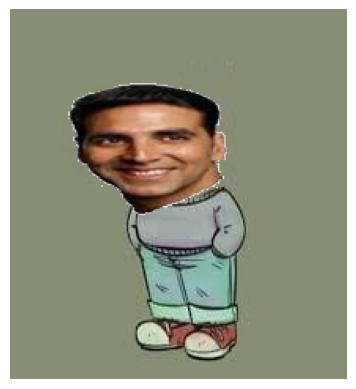

In [96]:
person_image = Image.open('/content/only_face.jpg')
meme_image = Image.open('/content/chillguy.jpeg')

# Convert meme image to RGBA (for transparency handling) and to a NumPy array
meme_image = meme_image.convert("RGBA")
meme_data = np.array(meme_image)

# Define the coordinates of the face region in the meme image
face_x, face_y, face_width, face_height = 0, 40, 180, 110  # Adjust based on meme image

# Clamp the face region to ensure it is within bounds
meme_height, meme_width = meme_data.shape[:2]
face_width = min(face_width, meme_width - face_x)
face_height = min(face_height, meme_height - face_y)

# Resize the person's image to fit the face region
person_resized = person_image.resize((face_width, face_height)).convert("RGBA")

person_resized = ImageOps.mirror(person_resized)

person_data = np.array(person_resized)

r, g, b, a = person_data[..., 0], person_data[..., 1], person_data[..., 2], person_data[..., 3]
white_areas = (r > 230) & (g > 230) & (b > 230)
person_data[white_areas, 3] = 0

person_resized = Image.fromarray(person_data)

face_region = meme_data[face_y:face_y+face_height, face_x:face_x+face_width]

face_region_resized = Image.fromarray(face_region).resize((face_width, face_height))

blended_region = Image.alpha_composite(face_region_resized, person_resized)

blended_region_data = np.array(blended_region)
meme_data[face_y:face_y+face_height, face_x:face_x+face_width] = blended_region_data

result_image = Image.fromarray(meme_data)

plt.imshow(result_image)
plt.axis("off")
plt.show()

In [81]:
meme_image = np.array(meme_image)
print(meme_image.shape)
result_image = np.array(result_image)
print(result_image.shape)

(235, 214, 4)
(235, 214, 4)


In [82]:
# coordinates:
#left corner (82, 116)
#right corner (132, 114)